<a href="https://colab.research.google.com/github/IceCao/UTS-Pengolahan-Citra-Digital/blob/main/UTS_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3034956627.py:21: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-3034956627.py:21: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-3034956627.py:22: RuntimeWarning: divide by zero encountered in log
  logaritmik = c * np.log(1 + img)
/tmp/ipython-input-3034956627.py:22: RuntimeWarning: invalid value encountered in multiply
  logaritmik = c * np.log(1 + img)
/tmp/ipython-input-3034956627.py:23: RuntimeWarning: invalid value encountered in cast
  logaritmik = np.array(logaritmik, dtype=np.uint8)
/tmp/ipython-input-3034956627.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,0].hist(img.ravel(), 256, [0,256])
/tmp/ipython-input-3034956627.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is

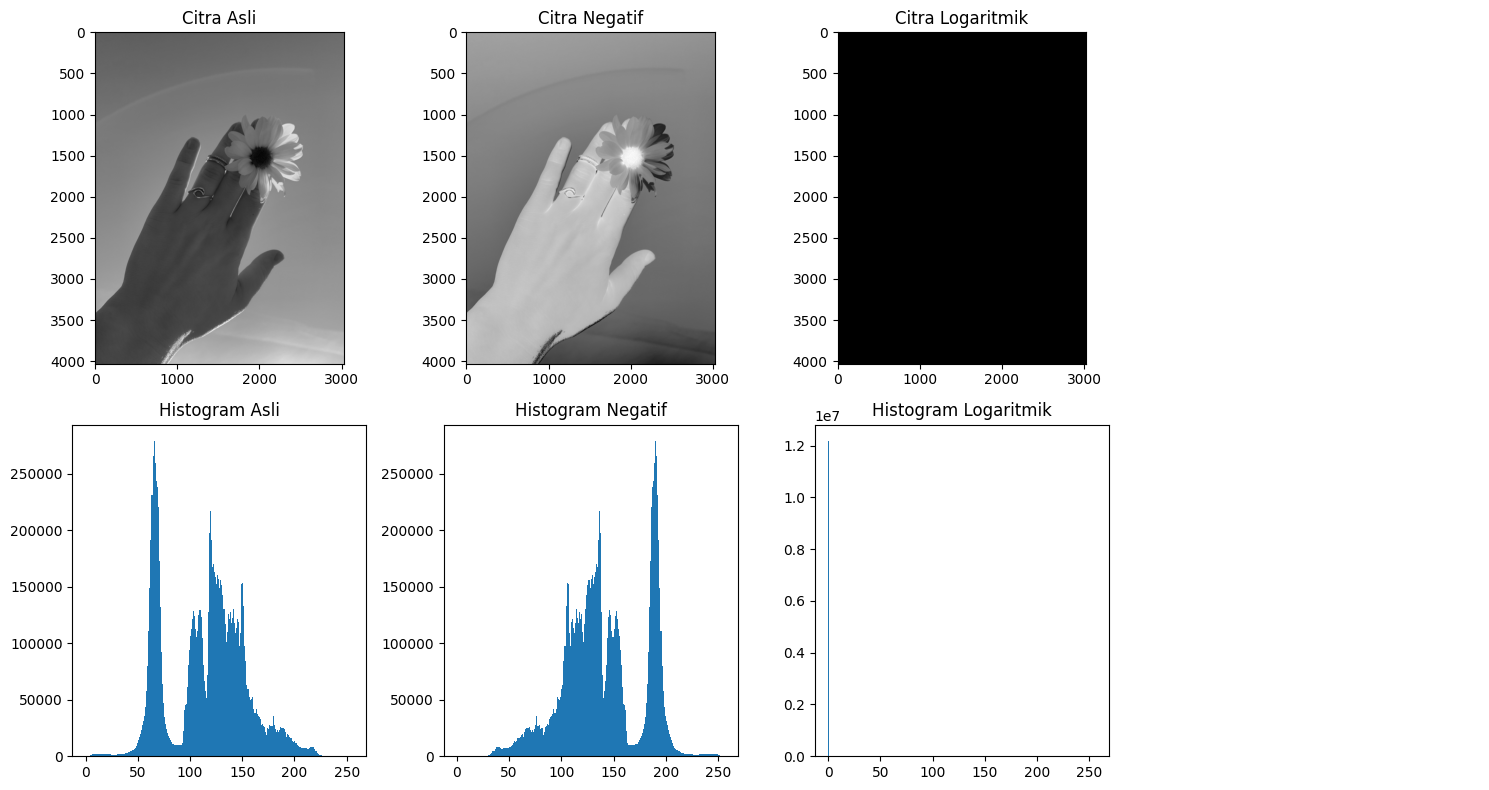

=== ANALISA NILAI RATA-RATA KEABUAN ===
Citra Asli       : 114.62
Citra Negatif    : 140.38
Citra Logaritmik : 0.00
File analisa_soal1.txt telah disimpan.


In [7]:
# === SOAL 1: TRANSFORMASI CITRA GRAYSCALE ===
# Dosen: Anggay Luri Pramana, S.Kom., M.Kom
# Mata kuliah: Pengolahan Citra Digital
# Nama: Riskhi Ardhika Akbar
# NIM: 23423009
# --------------------------------------------

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca citra grayscale
img = cv2.imread('gambar-10.jpg', cv2.IMREAD_GRAYSCALE)  # ganti path sesuai citramu
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Pastikan path benar!")

# 2. Transformasi negatif
negatif = 255 - img

# 3. Transformasi logaritmik
c = 255 / np.log(1 + np.max(img))
logaritmik = c * np.log(1 + img)
logaritmik = np.array(logaritmik, dtype=np.uint8)

# 4. Menampilkan hasil
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Baris 1: gambar
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title("Citra Asli")
axes[0,1].imshow(negatif, cmap='gray')
axes[0,1].set_title("Citra Negatif")
axes[0,2].imshow(logaritmik, cmap='gray')
axes[0,2].set_title("Citra Logaritmik")
axes[0,3].axis('off')

# Baris 2: histogram
axes[1,0].hist(img.ravel(), 256, [0,256])
axes[1,0].set_title("Histogram Asli")
axes[1,1].hist(negatif.ravel(), 256, [0,256])
axes[1,1].set_title("Histogram Negatif")
axes[1,2].hist(logaritmik.ravel(), 256, [0,256])
axes[1,2].set_title("Histogram Logaritmik")
axes[1,3].axis('off')

plt.tight_layout()
plt.show()

# 5. Analisa otomatis nilai keabuan
print("=== ANALISA NILAI RATA-RATA KEABUAN ===")
print(f"Citra Asli       : {np.mean(img):.2f}")
print(f"Citra Negatif    : {np.mean(negatif):.2f}")
print(f"Citra Logaritmik : {np.mean(logaritmik):.2f}")

# Simpan analisis ke file .txt
with open("analisa_soal1.txt", "w") as f:
    f.write("Analisa Transformasi Citra\n")
    f.write("---------------------------------\n")
    f.write(f"Rata-rata Asli       : {np.mean(img):.2f}\n")
    f.write(f"Rata-rata Negatif    : {np.mean(negatif):.2f}\n")
    f.write(f"Rata-rata Logaritmik : {np.mean(logaritmik):.2f}\n\n")
    f.write("Perbandingan:\n")
    f.write("- Citra negatif membalik distribusi keabuan, area terang jadi gelap dan sebaliknya.\n")
    f.write("- Citra logaritmik memperkuat detail pada area gelap karena fungsi log bersifat non-linear.\n")
    f.write("- Transformasi logaritmik lebih bermanfaat untuk gambar dengan rentang dinamis rendah atau area gelap dominan.\n")

print("File analisa_soal1.txt telah disimpan.")


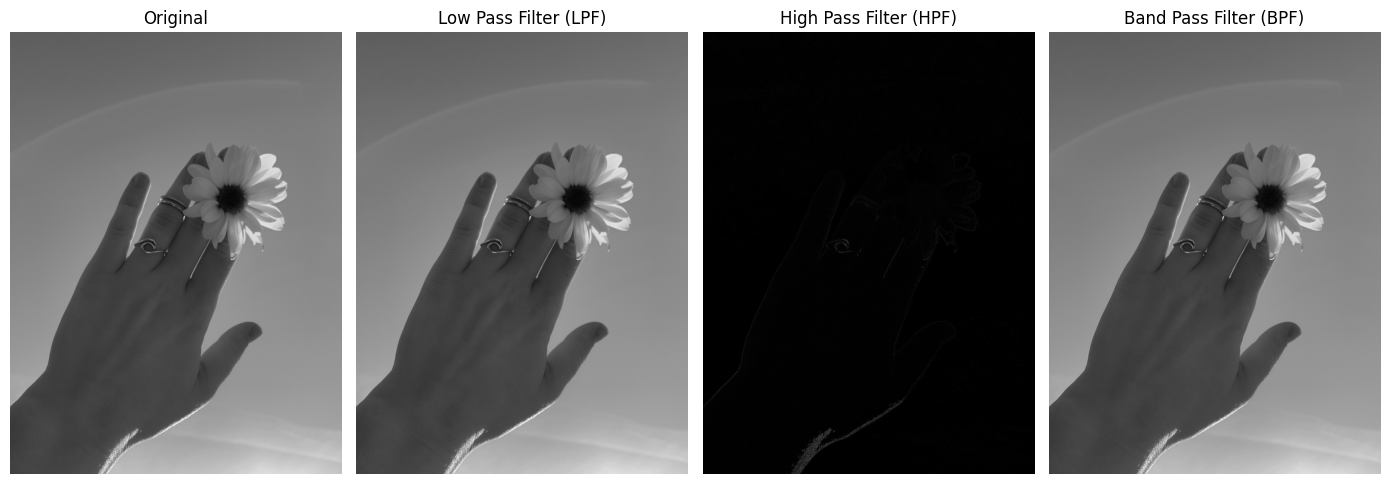

=== NILAI RATA-RATA PIXEL ===
Original            : 114.62
LPF                 : 114.62
HPF                 : 1.90
BPF                 : 114.60
File analisa_soal2.txt telah disimpan.


In [9]:
# === SOAL 2: KONVOLUSI FILTER SPASIAL ===
# Nama: Riskhi Ardhika Akbar
# NIM: 23423009
# ----------------------------------------

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca citra grayscale
img = cv2.imread('gambar-10.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Pastikan path benar!")

# 2. Definisi kernel
kernel_LPF = (1/9) * np.ones((3,3))
kernel_HPF = np.array([[-1,-1,-1],
                       [-1, 8,-1],
                       [-1,-1,-1]])
kernel_BPF = np.array([[ 0,-1, 0],
                       [-1, 5,-1],
                       [ 0,-1, 0]])

# 3. Terapkan konvolusi (filter2D)
LPF = cv2.filter2D(img, -1, kernel_LPF)
HPF = cv2.filter2D(img, -1, kernel_HPF)
BPF = cv2.filter2D(img, -1, kernel_BPF)

# 4. Tampilkan hasil dalam satu figure
plt.figure(figsize=(14,8))
titles = ['Original', 'Low Pass Filter (LPF)', 'High Pass Filter (HPF)', 'Band Pass Filter (BPF)']
images = [img, LPF, HPF, BPF]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# 5. Analisis otomatis
mean_values = {
    'Original': np.mean(img),
    'LPF': np.mean(LPF),
    'HPF': np.mean(HPF),
    'BPF': np.mean(BPF)
}

# Cetak hasil analisis
print("=== NILAI RATA-RATA PIXEL ===")
for k, v in mean_values.items():
    print(f"{k:20}: {v:.2f}")

# Simpan analisa ke file
with open("analisa_soal2.txt", "w") as f:
    f.write("Analisa Konvolusi Filter Spasial\n")
    f.write("---------------------------------\n")
    for k, v in mean_values.items():
        f.write(f"{k:20}: {v:.2f}\n")
    f.write("\nInterpretasi:\n")
    f.write("- LPF menghasilkan gambar halus (frekuensi tinggi ditekan, noise berkurang).\n")
    f.write("- HPF menonjolkan tepi (frekuensi tinggi dipertajam, namun noise meningkat).\n")
    f.write("- BPF menggabungkan keduanya untuk memperjelas detail namun tetap halus.\n")
    f.write("\nHubungan domain spasial & frekuensi:\n")
    f.write("• Domain spasial: operasi langsung pada piksel dengan kernel.\n")
    f.write("• Domain frekuensi: mempengaruhi rentang frekuensi (low/high).\n")
    f.write("  LPF → low frequency, HPF → high frequency, BPF → kombinasi keduanya.\n")

print("File analisa_soal2.txt telah disimpan.")
